# Facial landmark indexes for face regions

The facial landmark detector implemented inside dlib produces 68 (x, y)-coordinates that map to specific facial structures. These 68 point mappings were obtained by training a shape predictor on the labeled iBUG 300-W dataset.

Below we can visualize what each of these 68 coordinates map to:

<img src="https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg">


Examining the image, we can see that facial regions can be accessed via simple Python indexing (assuming zero-indexing with Python since the image above is one-indexed):

- The mouth can be accessed through points [48, 68].
- The right eyebrow through points [17, 22].
- The left eyebrow through points [22, 27].
- The right eye using [36, 42].
- The left eye with [42, 48].
- The nose using [27, 35].
- And the jaw via [0, 17].

These mappings are encoded inside the `FACIAL_LANDMARKS_IDXS`  dictionary inside `face_utils` of the `imutils` library. Using this dictionary we can easily extract the indexes into the facial landmarks array and extract various facial features simply by supplying a string as a key.

 ## Visualizing facial landmarks with OpenCV 
 
To accomplish this, we’ll need the `visualize_facial_landmarks`  function, already included in the `imutils` library:

`visualize_facial_landmarks(image, shape, colors=None, alpha=0.75)`

Our `visualize_facial_landmarks`  function requires two arguments, followed by two optional ones, each detailed below:

- `image` : The image that we are going to draw our facial landmark visualizations on.
- `shape` : The NumPy array that contains the 68 facial landmark coordinates that map to various facial parts.
- `colors` : A list of BGR tuples used to color-code each of the facial landmark regions.
- `alpha` : A parameter used to control the opacity of the overlay on the original image.

In [8]:
# import necessary packages
import dlib
from imutils import face_utils
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path_image = "myimg4.jpg"
# # This is the path to the facial landmark perdictor 
path_shape_predictor = "shape_predictor_68_face_landmarks.dat"

In [2]:
# initialize dlib's face detector(HOG-based) and then create 
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(path_shape_predictor)

In [3]:
# load up the image, resize it and convert to grayscale
image = cv2.imread(path_image)
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [4]:
# detect faces in image, upsamle the image to make objects more distinguished
rects = detector(gray, upsample_num_times=1)

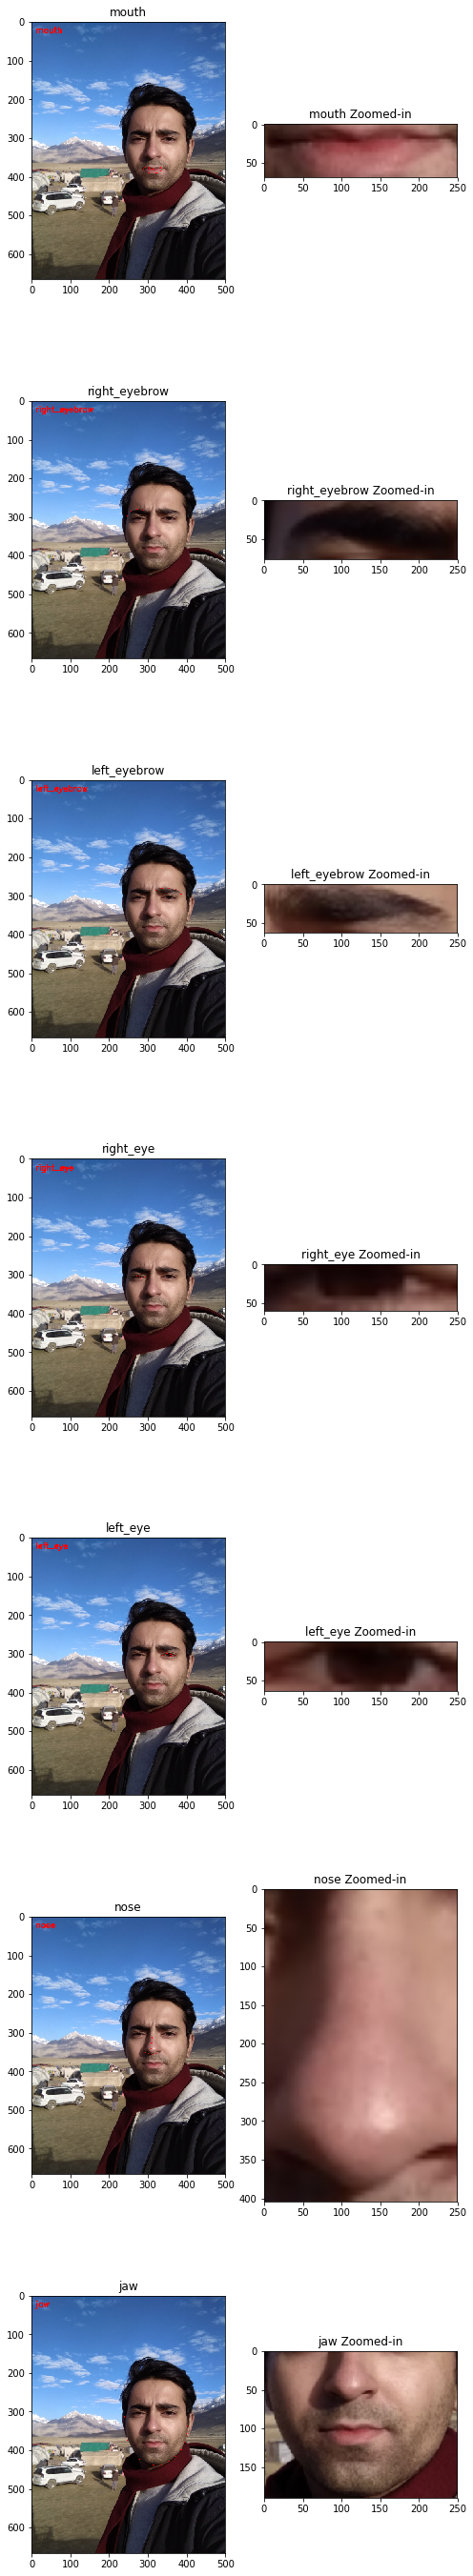

In [29]:
fig, ax = plt.subplots(7, 2, figsize=(8,50))
output= None
# loop over the face detections 
for i, rect in enumerate(rects):
    
    # get landmarks based on bounding box
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape) # convert from dlib.point object to numpy
    
    ax_iter = 0
    # loop over the face parts individually
    for (name, (i,j)) in face_utils.FACIAL_LANDMARKS_68_IDXS.items():
       
        # clone the og image so we can draw on it, then
        # display the name of the face part on the image
        clone = image.copy()
        cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        
        # loop over this facial feature, drawing over it
        for x,y, in shape[i:j]:
            cv2.circle(clone, (x,y), 1, (0, 0,255,), -1)
            
        # extract the region of interest(ROI) as a separate image
        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
        roi = image[y:y+h, x:x+w]
        roi = imutils.resize(roi, width=250, inter=cv2.INTER_LINEAR)
            
        # show the particular face part
        ax[ax_iter][1].imshow(roi[...,::-1])
        ax[ax_iter][1].set_title(name+" Zoomed-in")
        ax[ax_iter][0].imshow(clone[...,::-1])
        ax[ax_iter][0].set_title(name)
        ax_iter+=1
    
    # visualize all facial landmarks with a transparent overlay
    output = face_utils.visualize_facial_landmarks(image, shape)

plt.show()

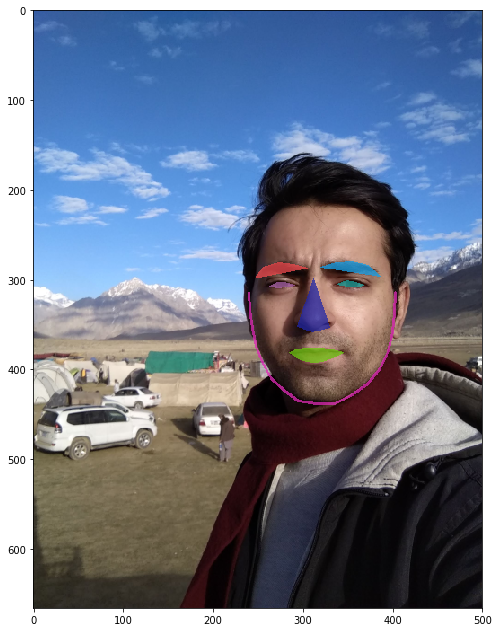

In [30]:
fig = plt.figure(figsize=(11,11))
plt.imshow(output[...,::-1])
plt.show()